C:\Users\ccw\AppData\Local\Temp\ipykernel_21772\2710965830.py:45: OptimizeWarning: Unknown solver options: tol
  result = minimize(neg_log_likelihood, params0, method="Nelder-Mead", \


[0.70284629 2.19579018 9.72334409 4.53321645 4.38323719]


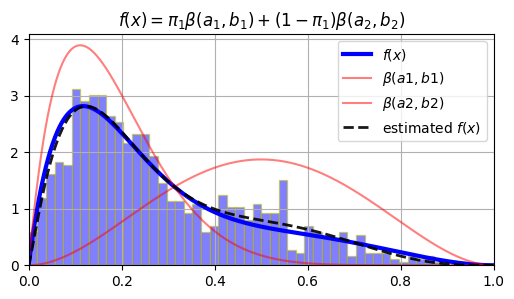

In [11]:
# compute MLE of the mixture of two beta distributions from the random samples
import numpy as np
from scipy.stats import beta, binom
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# parameters of the mixture of two beta distributions -------
a1, b1 = 2, 9
a2, b2 = 3, 3
pi1 = 0.7
n = 1000
# -----------------------------------------------------------
# generate random samples from the mixture of two beta distributions

n1 = binom.rvs(n, pi1)
x1 = beta.rvs(a1, b1, size=n1)
x2 = beta.rvs(a2, b2, size=n - n1)
x_all = np.concatenate((x1, x2))
# -----------------------------------------------------------
# plot the mixture of two beta distributions
f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
y = f(x)
fig = plt.figure(figsize=[6, 3])
plt.hist(x_all, density=True, bins=50, alpha=0.5, color='b', edgecolor='y')
plt.xlim(0, 1)
plt.plot(x, y, color="blue", linewidth=3, label="$f(x)$")
plt.grid()
plt.plot(x, beta.pdf(x, a1, b1), color="red", alpha=0.5, label="$\\beta(a1, b1)$")
plt.plot(x, beta.pdf(x, a2, b2), color="red", alpha=0.5, label="$\\beta(a2, b2)$")
plt.title("$f(x) = \\pi_1 \\beta(a_1, b_1) + (1 - \\pi_1) \\beta(a_2, b_2)$")

# MLE of the mixture of two beta distributions
# negative log-likelihood function
def neg_log_likelihood(params):
    pi1, a1, b1, a2, b2 = params
    f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
    return -np.sum(np.log(f(x_all)))

# initial guess for the parameters
params0 = [0.7, 2, 9, 3, 3]
# add constraints for the parameters
bnd = ((0, 1), (0, None), (0, None), (0, None), (0, None))
opts = {"disp": False, "maxiter": 8000, "tol": 1e-6} 
result = minimize(neg_log_likelihood, params0, method="Nelder-Mead", \
                  bounds=bnd, options=opts)

# print the estimated parameters
print(result.x)

# plot the estimated distribution
pi1, a1, b1, a2, b2 = result.x
f_hat = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
y = f_hat(x)
plt.plot(x, y, color="black", linestyle="--", linewidth=2,\
            alpha=0.9, label="estimated $f(x)$")
plt.legend()
plt.show()

In [ ]:
# compute MLE of the mixture of two beta distributions from the random samples
import numpy as np
from scipy.stats import beta, binom
from scipy.optimize import minimize
# import matplotlib.pyplot as plt

# parameters of the mixture of two beta distributions -------
a1, b1 = 2, 9
a2, b2 = 3, 3
pi1 = 0.7
# n = 1000 # sample size
n = [100, 300]
N = 100 # number of simulations
# -----------------------------------------------------------
# initial guess for the parameters
params0 = [0.7, 2, 9, 3, 3]
# add constraints for the parameters
bnd = ((0, 1), (0, None), (0, None), (0, None), (0, None))
opts = {"disp": False, "maxiter": 8000, "tol": 1e-6} 

for j in range(len(n)):
    n1 = binom.rvs(n[j], pi1)
    RESULT = np.zeros((N, 5))
    SAMPLE = np.r_[beta.rvs(a1, b1, size = (n1, N)), \
                            beta.rvs(a2, b2, size = (n-n1, N))]

    for i in range(N):
        x_all = SAMPLE[:, i]

        f = lambda x:  -np.sum(np.log(x[0] * beta.pdf(x_all, x[1], x[2]) + \
                                    (1 - x[0]) * beta.pdf(x_all, x[3], x[4])))
        
        result = minimize(f, params0, method="L-BFGS-B", \
                        bounds=bnd, options=opts)
        RESULT[i, :] = result.x
    # Evaluation


C:\Users\ccw\AppData\Local\Temp\ipykernel_21772\1674811116.py:31: OptimizeWarning: Unknown solver options: tol
  result = minimize(f, params0, method="L-BFGS-B", \
